1. Introduction

I will replicate the Car Price prediction made in R by me as my final exam on the 'Big Data' class, using Python.

The automotive industry is a major industrial and economic force worldwide. It produces 60 million cars and trucks a year, and these are responsible for almost half of the world's oil consumption, it also employs 4 million directly and many more indirectly. The automobile industry maintains a very strong influence and importance, it also provides high-paying jobs, has strong links with supplier industries (which gives it an outsized role in economic development), and has strong political influence.

Customers are becoming most demanding due to the multiple options of choice. Knowing some technical attributes and the price of the cars, the present project aims to answer some research questions:

What is the connection between the factors that influence the price of cars?
If this link exists, how strong is it?
Do these variables influence the price of the car to the same extent or in different proportions?
Is it possible to estimate the price of a car according to the chosen factors?
Is there a synergy between the relevant factors?

2. Data Collection and Understanding:

CarName: The name and model of the car.

fueltype: The type of fuel the car uses (gas/diesel).

aspiration: The aspiration method of the engine (standars/turbo).

doornumber: The number of doors on the car (two doors or four doors).

carbody: The body style of the car (convertible, hatchback, sedan, wagon, hardtop).

drivewheel: The type of drivetrain configuration (front-wheel drive, rear-wheel drive, all-wheel drive).

enginelocation: The location of the car's engine (front or rear).

wheelbase: The distance between the centers of the front and rear wheels.

enginesize: The size or displacement of the car's engine.

fuelsystem: The type of fuel delivery system (e.g., fuel injection, carburetor).

boreratio: The ratio of the cylinder bore diameter to the piston stroke length.

stroke: The length of the piston stroke in the engine.

compressionratio: The ratio of the cylinder volume at the bottom of the piston stroke to the volume at the top.

horsepower: The power output of the engine in terms of horsepower.

peakrpm: The engine speed at which the highest power output is achieved.

citympg: The miles per gallon (MPG) rating in city driving conditions.

highwaympg: The MPG rating on the highway or under highway driving conditions.

price: The price of the car.

These columns collectively represent a variety of technical and aesthetic characteristics of a car, which can be used to analyze factors influencing car prices.

The source: Kaggle.

In [798]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [799]:
dataset = pd.read_csv('carprice.csv')

In [800]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [801]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [802]:
dataset.shape

(205, 26)

3. Data Processing

Handle null values/duplicated values & perform data cleaning/transformation

In [803]:
dataset.drop(columns=['symboling'], inplace=True, axis=1)

In [804]:
dataset.isnull().any()

car_ID              False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [805]:
dataset.duplicated().sum()

0

In [806]:
dataset.describe()
#checks the numerical values

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [807]:
dataset.describe(include='object') 
#checks the categorial values

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


The CarName contains also the name of the car but also the brand of the car. I will separate and keep only the brand of the car wich holds more value for the price prediction.

In [808]:
Company_Car = dataset["CarName"].apply(lambda x: x.split(" ")[0])
dataset.insert(0,"Company_Car",Company_Car)

dataset.drop(columns=["CarName"],inplace=True)

In [809]:
dataset.head()

,Company_Car,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [810]:
dataset['Company_Car'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Some brands are incorrectly spelled (ex: toyouta -> toyota)

In [811]:
def replace(a,b):
    dataset["Company_Car"].replace(a,b,inplace=True)

replace('Nissan','nissan')
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [812]:
dataset['Company_Car'].value_counts()

Company_Car
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

4. Exploratory Data Analysis (EDA):

As a matter of aesthetics preference, I will use Seaborn for Data Visualization

<Figure size 1000x500 with 0 Axes>

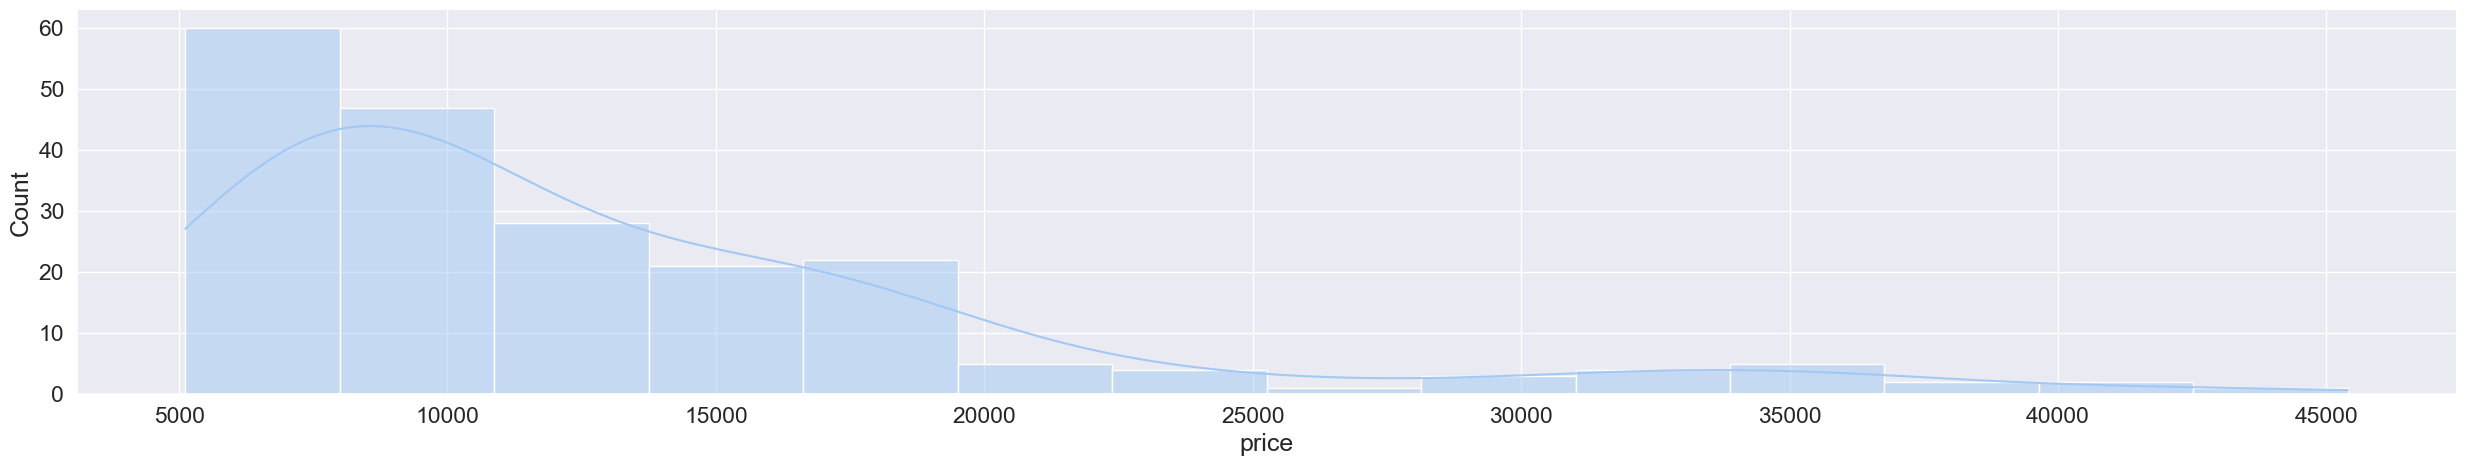

In [813]:
sns.set(style="darkgrid", palette="pastel", font_scale=1.5)
plt.figure(figsize=(10,5))
sns.displot(dataset["price"], kde=True, aspect=5)

In [814]:
dataset['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Observations:
- the price of the cars is positive stew (right-skewed distribution)
- the average price of a car is 13.000M.U
- the cheapest car costs 5118M.U and the most expensive car costs 45400M.U
- the majority of the cars cost between 5.000-15.000M.U
- the pattern observed is that as the price decreases, the density of cars tends to increase, and conversely, as the price increases, the density of cars tends to decrease.

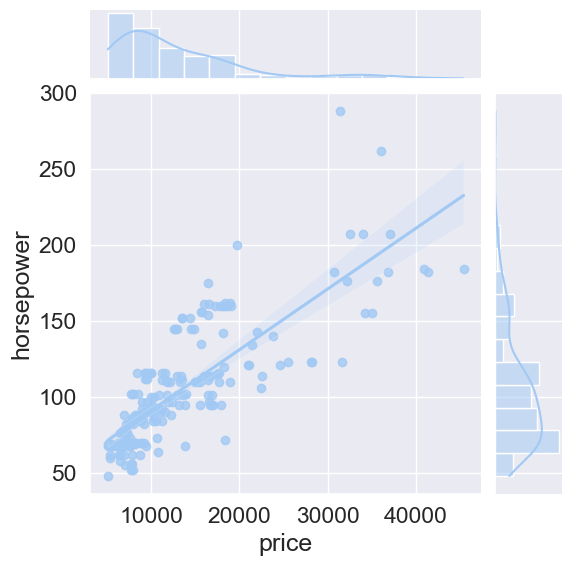

In [815]:
sns.jointplot(data=dataset, x='price',y='horsepower',kind='reg')

Observations:
-visually explore the connection between two variables, namely "price" and "horsepower."
-for each variable, there are separate histograms displaying their respective distributions.
-the presence of a diagonal line that traverses from the lower left to the upper right of the scatter plot implies a positive correlation between the variables.
-the density regions on the scatter plot and histograms indicate areas with a higher concentration of data points. On the x-axis, this concentration spans from 5000MU to 15000MU, while on the y-axis, it clusters around 100 units.
-notably, outliers in the scatter plot stand out as points that diverge significantly from the general pattern. In this context, these outliers represent the most expensive cars with horsepower exceeding 250 units.

<Axes: xlabel='price', ylabel='Company_Car'>

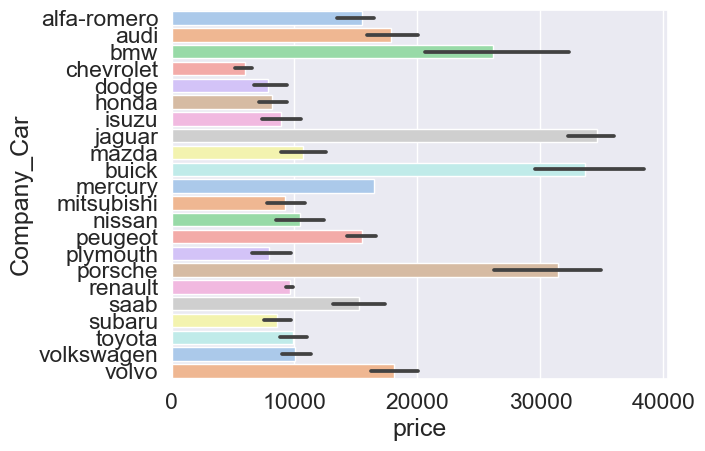

In [816]:
sns.barplot(data=dataset, x='price',y='Company_Car',palette="pastel")

Observations:
- the most expensive cars are sold by the Buick car company, then in descending order follows Jaguar and Porsche an then BMW.
- all the other companies have the price of the cars situated bellow ~20.000UM

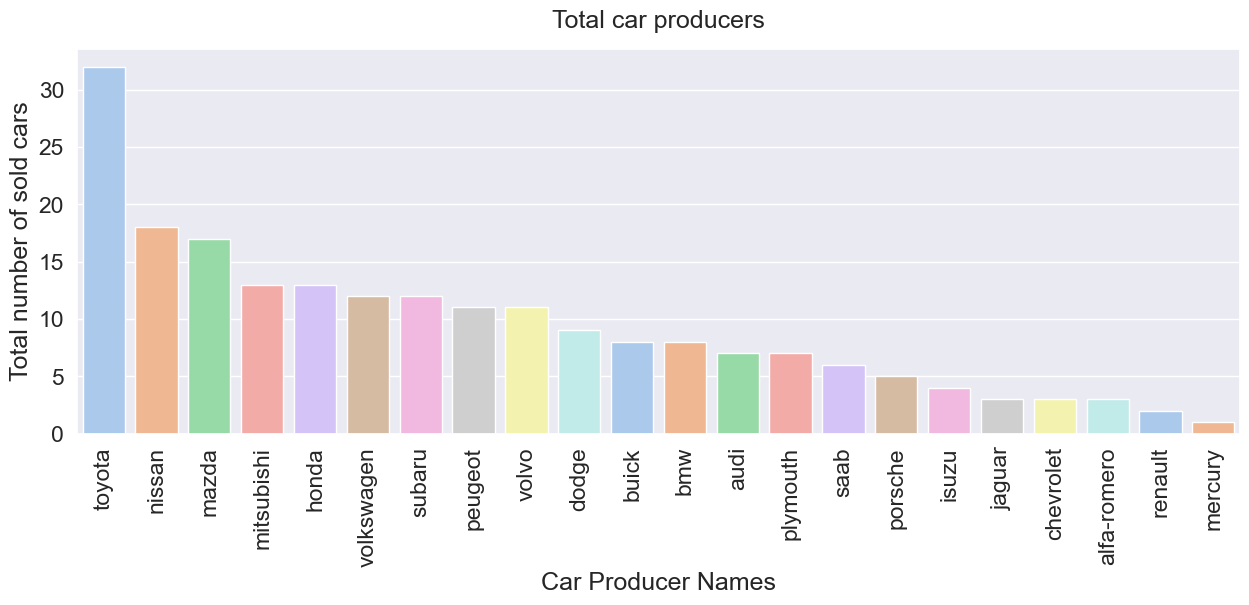

In [817]:
plt.figure(figsize=(15,5))
counts = dataset["Company_Car"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
plt.xlabel("Car Producer Names")
plt.ylabel("Total number of sold cars")
plt.title("Total car producers", pad=15)
plt.xticks(rotation=90)
plt.show()

Toyota is the best-selling car company, followed in popularity by Nissan and then Mazda.

In [818]:
#vissualy understand the relationship between the numerical values with the predictor price

def numerical_visualization(cols):
    x=1
    plt.figure(figsize=(15,5))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=dataset)
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

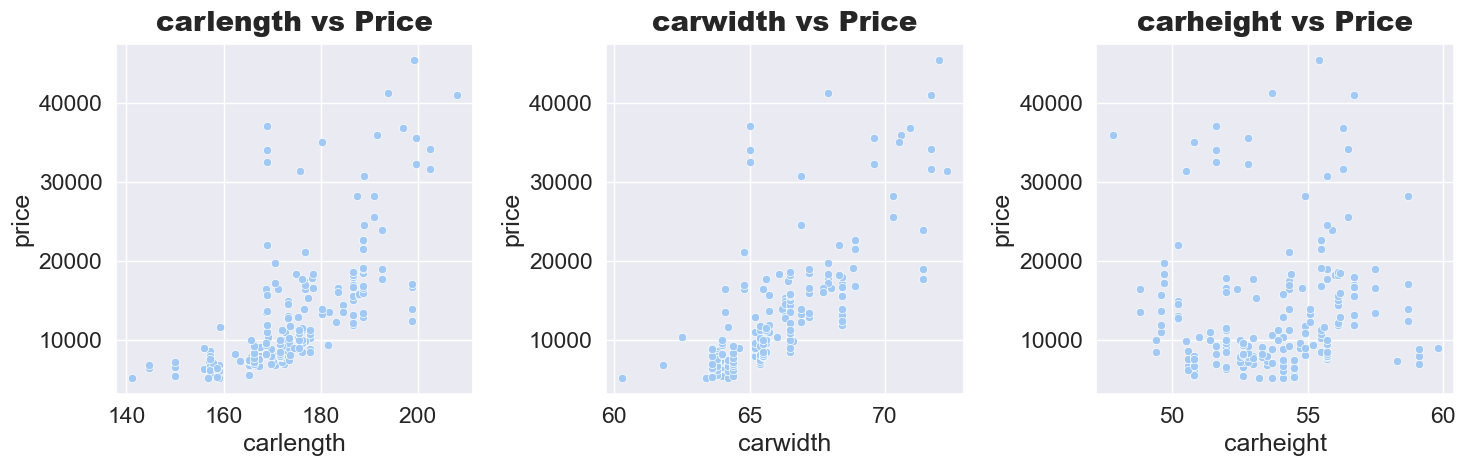

In [819]:
numerical_visualization(['carlength','carwidth','carheight'])

Observations:
- this scatterplot helps understanding the relation between two variables with numerical values. The scatter plot alone doesn't provide a correlation coefficient, but you can visually assess the direction and strength of the correlation between the variables.
- 'carlenght' and 'carwidth' data-points slope upwards from left to right, indicating a positive correlation.
- 'carheight' vs 'price' vertical trend imply no correlation, we can drop this feature for our model.

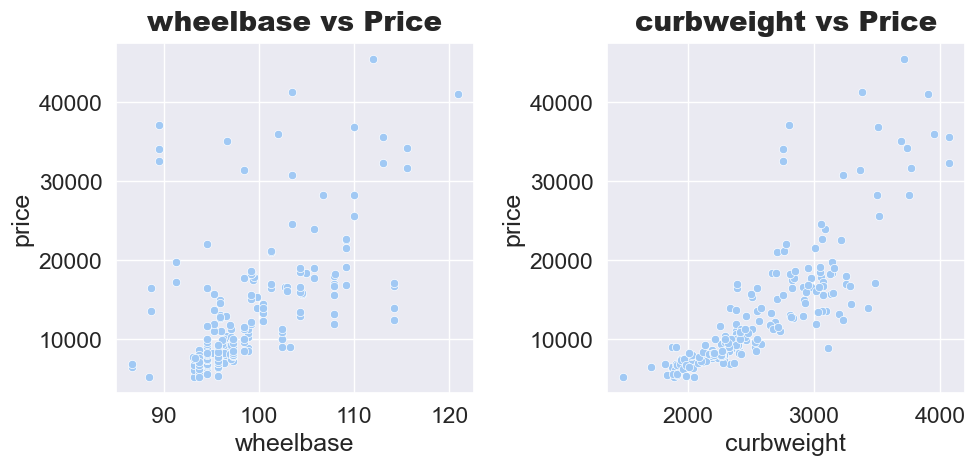

In [820]:
numerical_visualization(['wheelbase','curbweight'])

Obervations
-there exists a strong correlation between 'curbweight' and 'price',as the curbweight of cars rises, so does their price.
-between wheelbase and price, while the correlation is not notably strong, a discernible relationship is still present. 
-as the wheelbase of cars increases, their price also tends to rise.

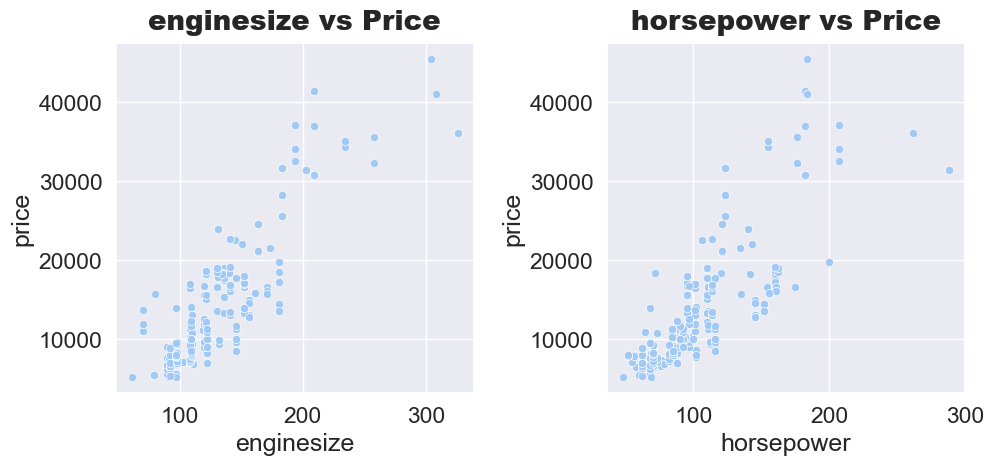

In [821]:
numerical_visualization(['enginesize','horsepower'])

Obervations
-there exists a strong correlation between 'enginesize' and 'price',as the size of the engine of cars rises, so does their price.
-same happens with 'horsepower' vs 'price'
-we keep both variables for the model prediction

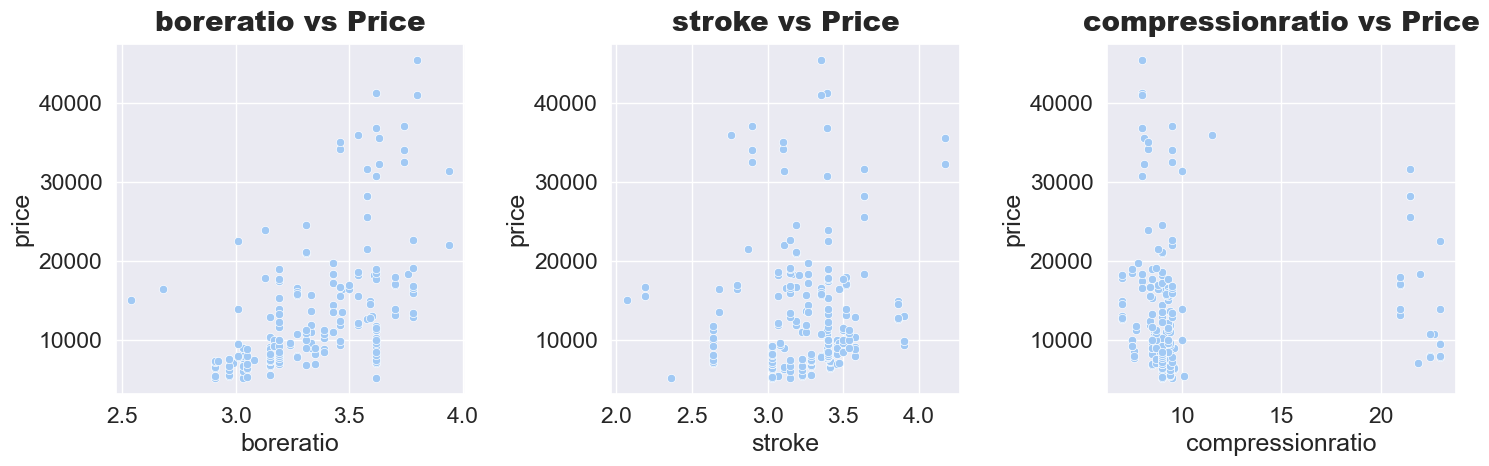

In [822]:
numerical_visualization(['boreratio','stroke','compressionratio'])

Observations:
-for 'stoke' and 'compressionratio' the data-points are too scattered for each of the variables, the features will be dropped
-from 'boreratio' vs 'price' we can observe that the feature is not highly correlated but still there's a correlation between the features, with the increment of the 'boreratio' the price also seems to increase.

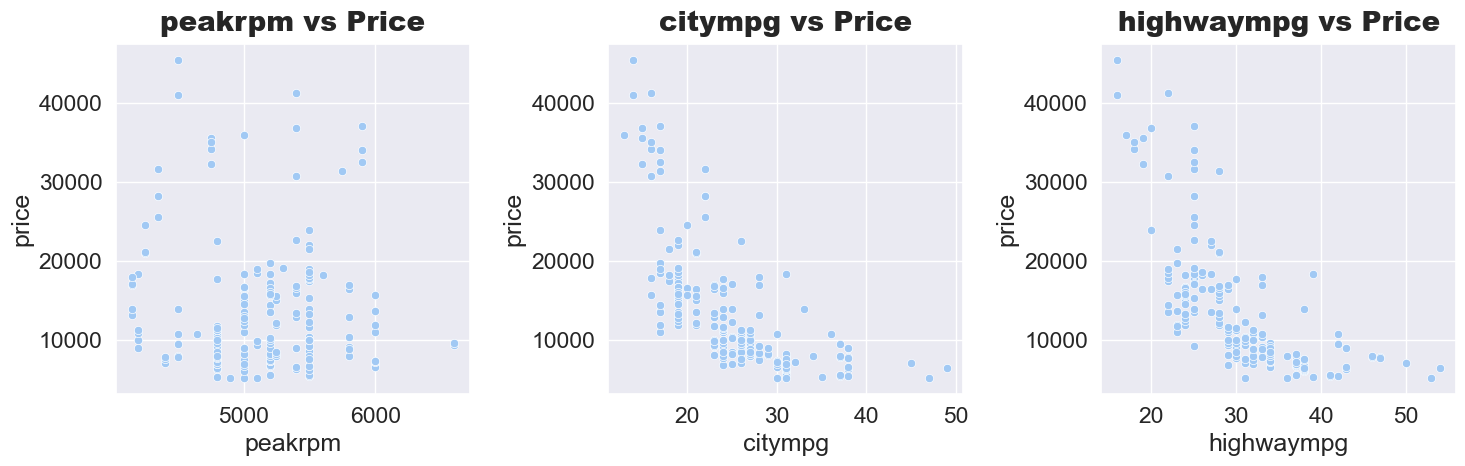

In [823]:
numerical_visualization(['peakrpm','citympg','highwaympg'])

Observations:
- data-points slope downwards from left to right, indicating a negative correlation
- as 'citympg' and 'highwaympg' increase, the price of the cars decrease
- 'peakrpm' feature will be droped as there is no visible correlation with the price of the cars

In [824]:
def categorical_visualization(cols):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=dataset, palette='pastel', order=dataset[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=20)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=dataset, palette='pastel')
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=20)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(dataset.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="pastel")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


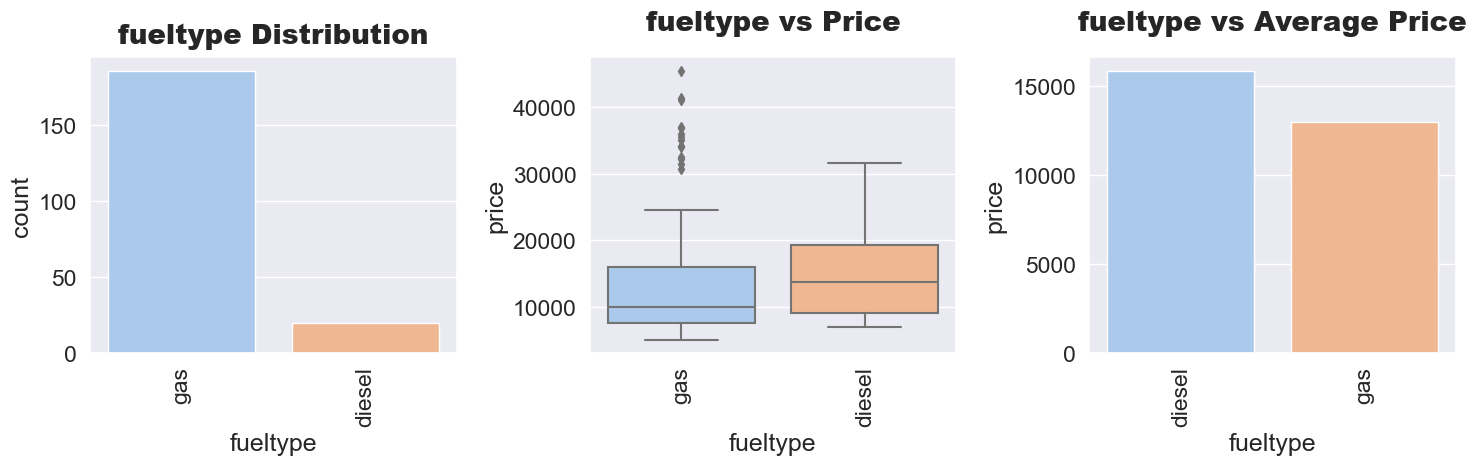

In [825]:
categorical_visualization("fueltype")

Observations: 
- within the dataset, the prevalent fuel type is gasoline, exhibiting a distinct prominence over diesel.
- both gasoline and diesel fuel variants are associated with car prices below 20,000MU. However, the gasoline category displays data points beyond the 30,000MU mark on the higher price end.
- in relation to the average car prices, the diesel system emerges as the predominant fuel type, it may be related to less price in fuels

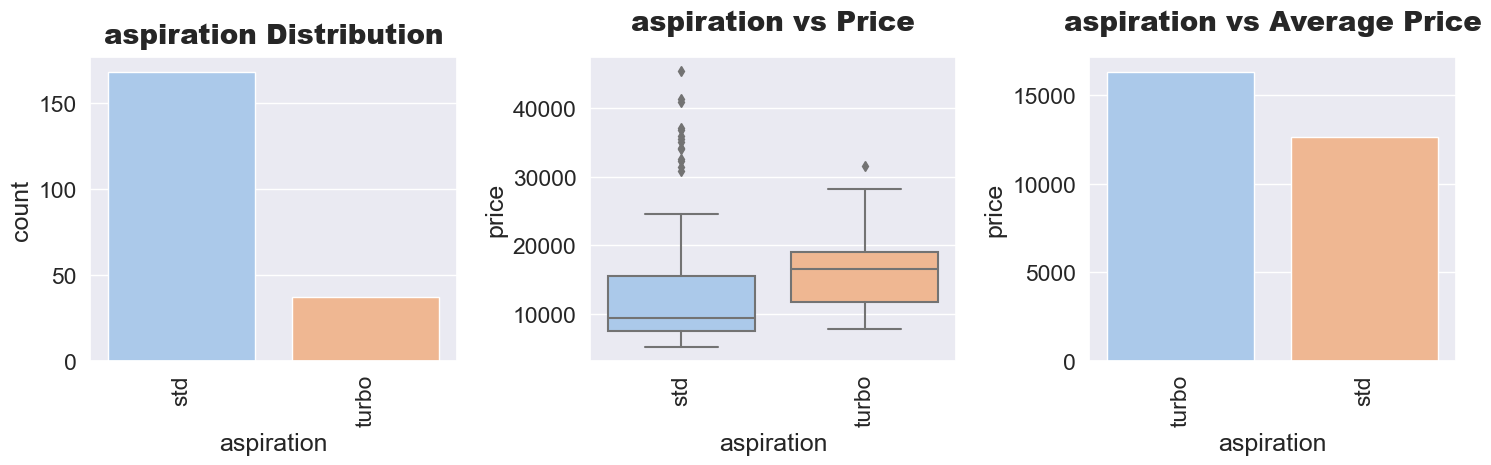

In [826]:
categorical_visualization("aspiration")

Observation:
- within the dataset, the standard aspiration has more popularity than turbo aspiration
- both standard and turbo aspiration type variants are associated with car prices below 20,000MU. However, the standars category displays data points beyond the 30,000MU mark on the higher price end.
- in relation to the average car prices, the turbo system emerges as the predominant type

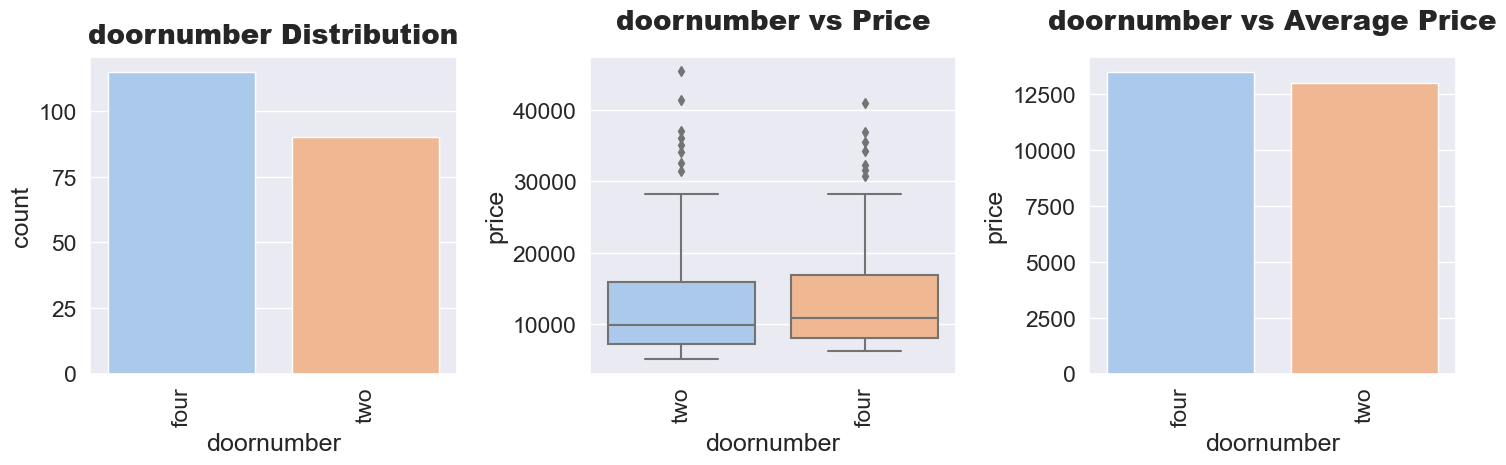

In [827]:
categorical_visualization("doornumber")

Observations:
- within the dataset, the four doornumber cars have more popularity than the two doornumber cars but with no significant difference
- both type of cars have the most data points in the lower price range,although there are a few exceptions in the higher price range
- compared to the average car prices, their distribution among buyer preferences appears nearly balanced

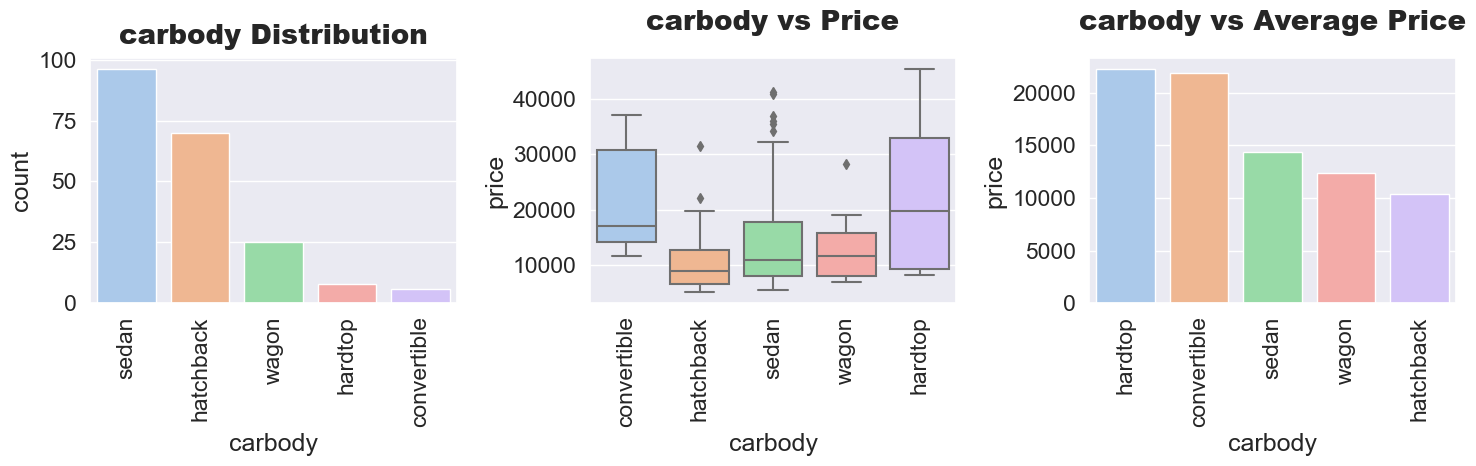

In [828]:
categorical_visualization("carbody")

Observations:

- sedan and hatchback are the prevailing preferences in terms of car body types.
- hardtop type spans a broad spectrum of prices, ranging from 10,000 to approximately 30,000 dollars.
- although sedan cars constitute a significant portion of our database, their prices are predominantly concentrated at the lower end, with only a few models positioned in the higher price range.
- it comes as no surprise that hardtop and convertible car types secure the top two positions in terms of price range when compared to the average, given their wide array of prices derived from the entire dataset.

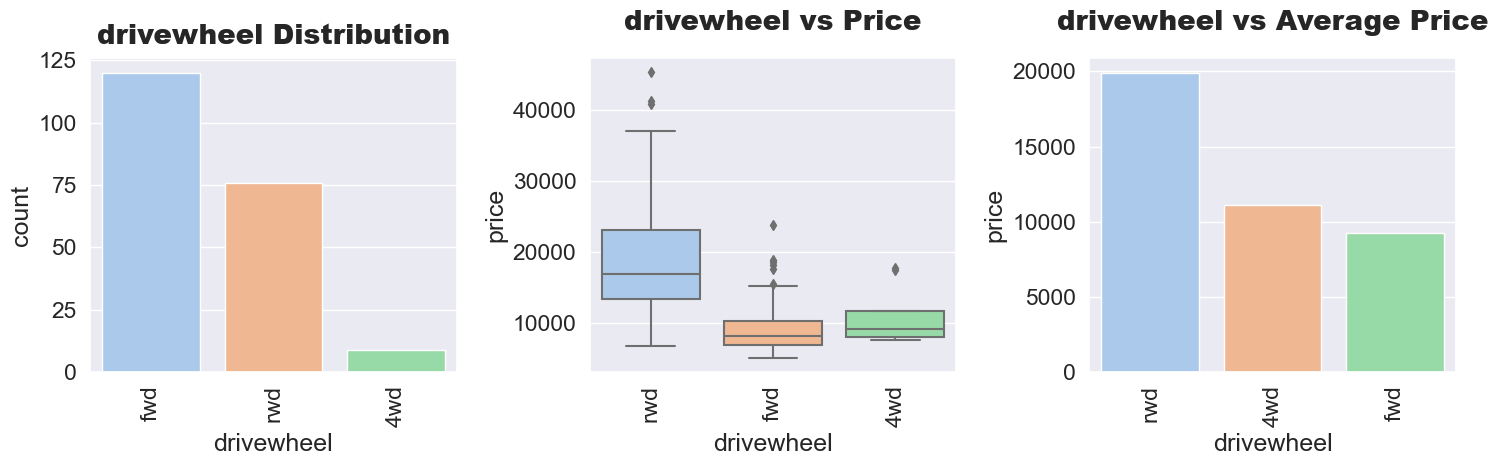

In [829]:
categorical_visualization("drivewheel")

Observations:
    
fwd = Front-wheel Drive
rwd = Rear-wheel Drive
4wd = Four wheel Drive

- the front-wheel drive system takes the lead in the distribution plot as well as when compared to the average price, emerging as the predominant choice among the majority of vehicles.


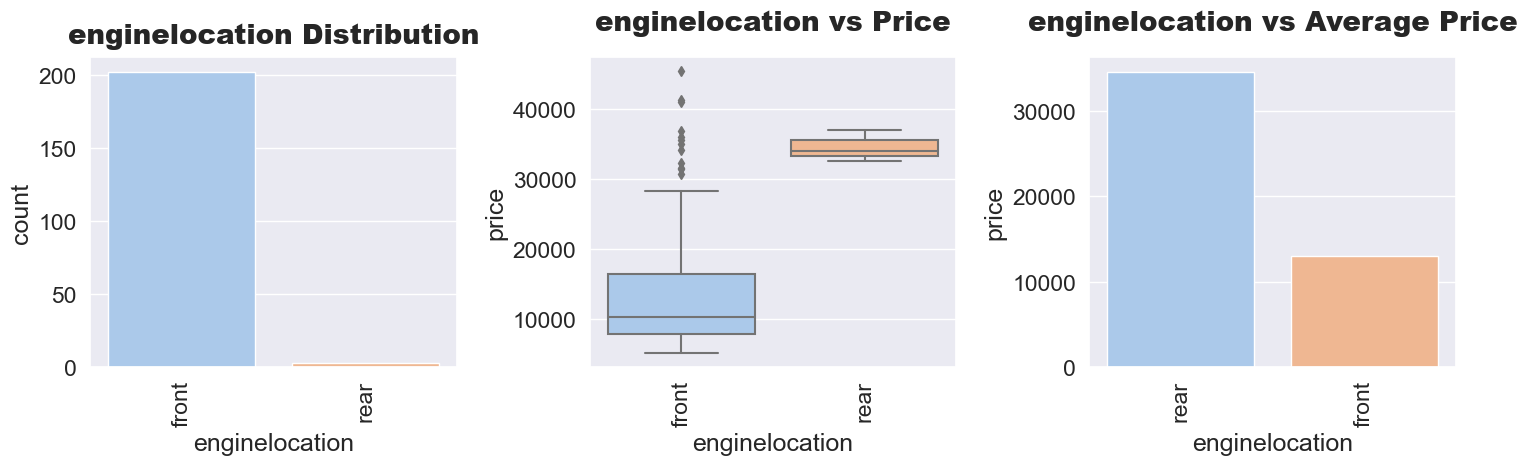

In [830]:
categorical_visualization("enginelocation")

In [831]:
dataset[dataset["enginelocation"]=="rear"]

,Company_Car,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,porsche,127,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,porsche,128,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,porsche,129,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


Observations:

- Considering that there are only three data-points in the rear category, drawing any conclusions about car price in relation to engine location is not feasible; thus, it might be prudent to omit this feature prior to training to avoid potential overfitting.

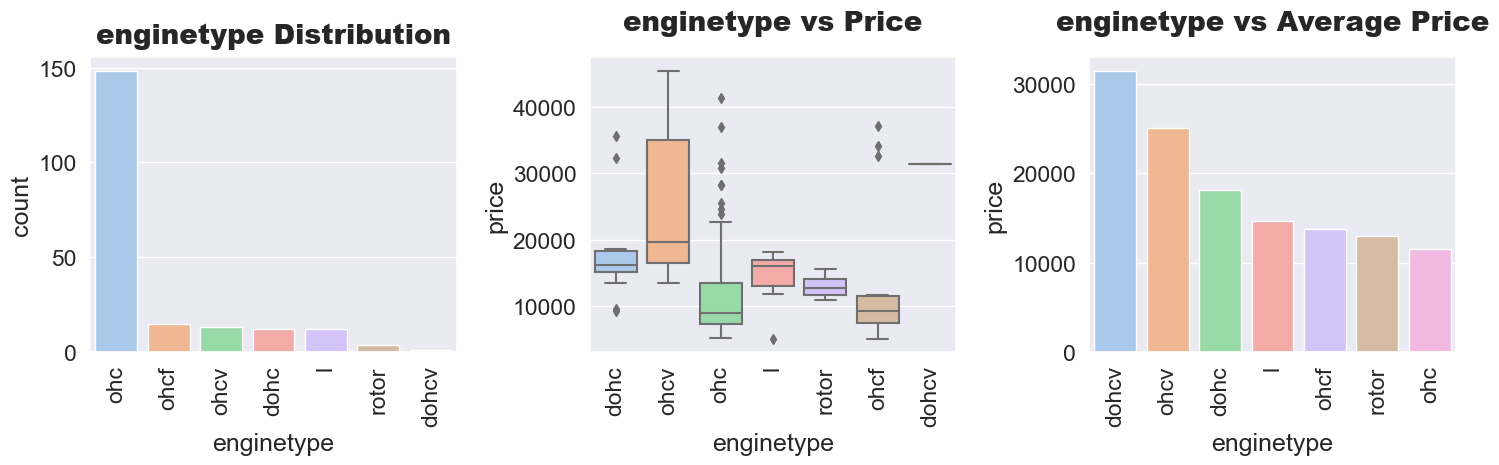

In [832]:
categorical_visualization("enginetype")

Observations:
ohc =  Overhead Camshaft engines
- Overhead Camshaft engines are the most popular
- the other relevant types are ohcf and ohcv with fewer data points


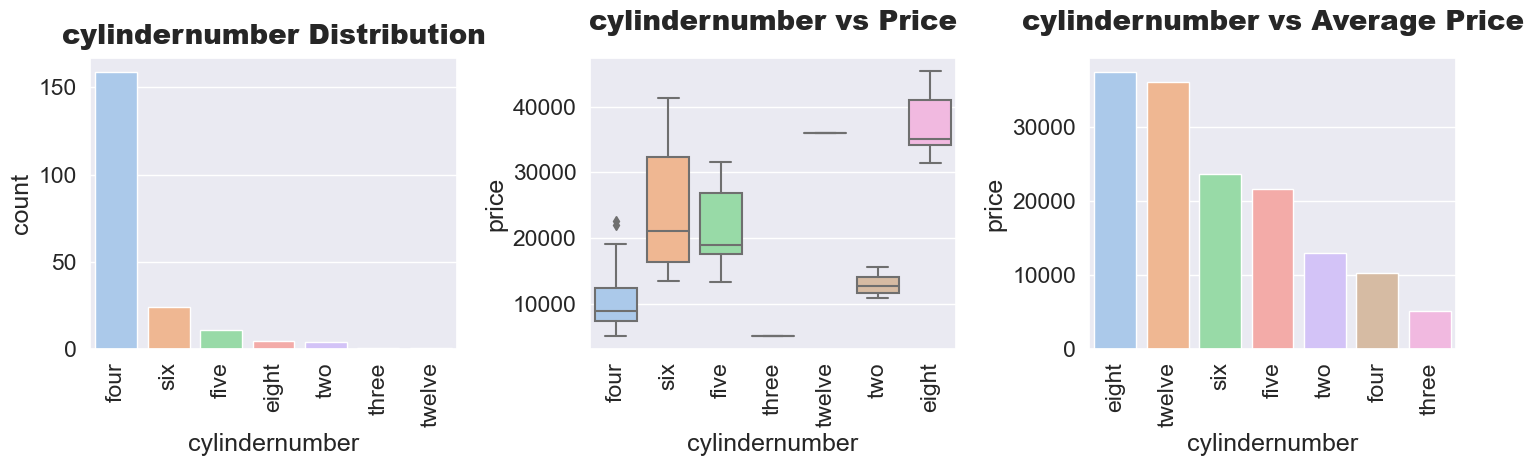

In [833]:
categorical_visualization("cylindernumber")

In [834]:
dataset[dataset["cylindernumber"]=="twelve"]

,Company_Car,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,jaguar,50,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [835]:
dataset[dataset["cylindernumber"]=="three"]

,Company_Car,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,chevrolet,19,gas,std,two,hatchback,fwd,front,88.4,141.1,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


Observations:

- the majority of vehicles are equipped with four-cylinder engines, and these four-cylinder cars tend to have lower prices.
- on the other hand, eight-cylinder engine types are associated with higher prices, both in absolute terms and when compared to the average price.
- there is only one instance each of three-cylinder and twelve-cylinder engine cars within the dataset.


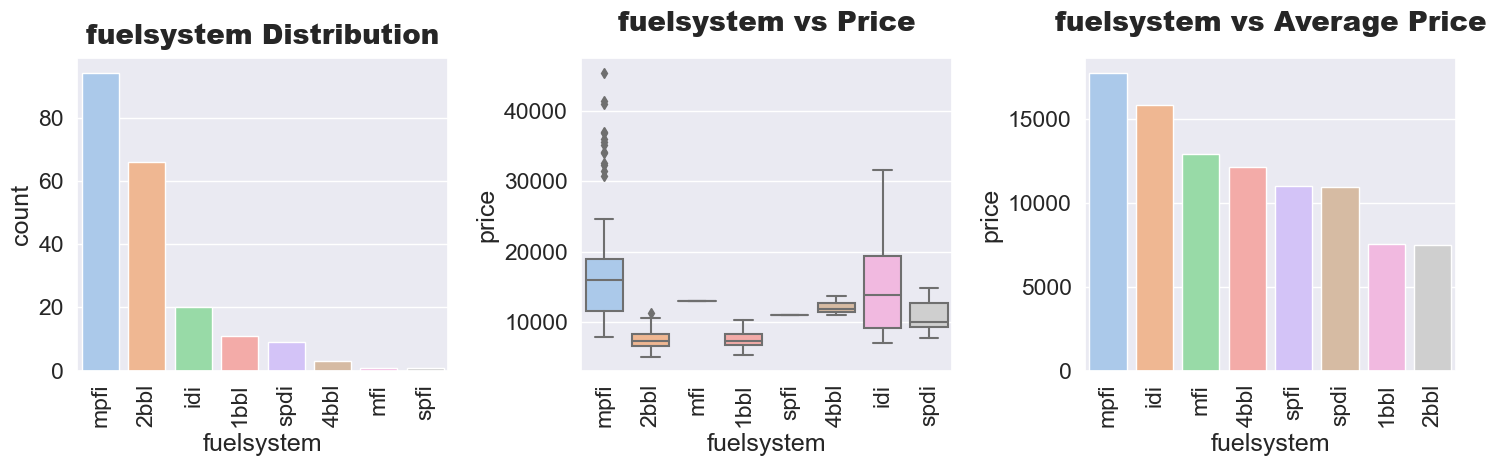

In [836]:
categorical_visualization("fuelsystem")

Observations:
mpfi = multi point fuel injection system
2bbl = two barrels, or venturi, in the carburetor

- the predominant fuel system among cars is mpfi, , followed by 2bbl 
- regarding pricing, MPFI exhibits a concentration between 10,000MU and 20,000MU, with a few instances exceeding 30,000MU. In contrast, the other fuel system types are consistently situated below 20,000MU.

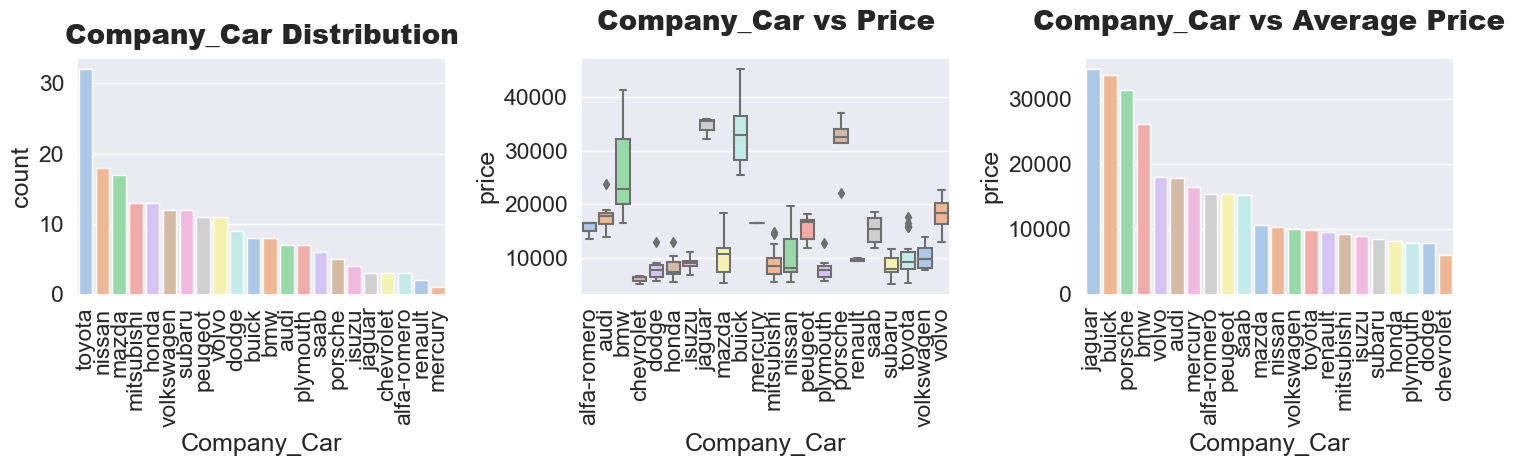

In [837]:
categorical_visualization("Company_Car")

Observations:
- the most expensive cars are sold by the Buick car company, then in descending order follows Jaguar and Porsche an then BMW.
- all the other companies have the price of the cars situated bellow ~20.000UM
- compared to the price average Jaguar is the most expensive, followed by Buick and Porsche
- the company cars will be devided by 3 categories to reduce the number of features:

Low range
Medium range
High range

In [838]:
newfeatures = round(dataset.groupby(["Company_Car"])["price"].agg(["mean"]),2).T
newfeatures

Company_Car,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,10652.88,...,10415.67,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [839]:
dataset = dataset.merge(newfeatures.T,how="left",on="Company_Car")

In [840]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
dataset['CarsRange'] = pd.cut(dataset['mean'],bins,right=False,labels=cars_bin)
dataset.head()

,Company_Car,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,alfa-romero,1,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,alfa-romero,2,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,alfa-romero,3,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,audi,4,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,audi,5,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


In [841]:
#Creating new DataFrame with all the useful Features.
new_df = dataset[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [842]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


In [843]:
# Creating Dummies Variables for all the Categorical Features

In [844]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df, dtype=float)

In [845]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [846]:
#The purpose of using a scaler like StandardScaler is to preprocess numerical features in the dataset before using them in machine learning algorithms.

In [847]:
from sklearn.preprocessing import StandardScaler

In [848]:
scaler = StandardScaler()

In [849]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [850]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [851]:
# Selecting Features & Labels for Model Training & Testing
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [852]:
x.shape

(205, 48)

In [853]:
y.shape

(205,)

In [854]:
#  Splitting Data for Model Traning & Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [855]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 48)
x_test - >   (41, 48)
y_train - >   (164,)
y_test - >   (41,)


In [856]:
#Model Building

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [857]:
training_score = []
testing_score = []

In [858]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [859]:

model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 96.03347906215075
r2_Score of LinearRegression() model on Testing Data is: 88.26307199077358


In [860]:
# Decision-Tree-Regressor Model
from sklearn.tree import DecisionTreeRegressor

model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 89.00445623162386


In [861]:
# Random-Forest-Regressor Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.79209294880964
r2_Score of RandomForestRegressor() model on Testing Data is: 95.20408254355107


In [862]:
# Ada-Boost-Regressor Model

model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.89278051127704
r2_Score of AdaBoostRegressor() model on Testing Data is: 91.10229328559072


In [863]:
# Gradient-Boosting-Regressor Model

model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.33147476783101
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.24845045418782


In [864]:
# LGMB Regressor Model
from lightgbm import LGBMRegressor

model_prediction(LGBMRegressor())

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [865]:
#  XGBRegressor Model
from xgboost import XGBRegressor

model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.86526030261638
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [866]:
# Cat-Boost-Regressor Model
from catboost import CatBoostRegressor

model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x0000021E742AD850> model on Training Data is: 99.70891236118644
r2_Score of <catboost.core.CatBoostRegressor object at 0x0000021E742AD850> model on Testing Data is: 93.92134628607332


In [867]:
#Comparing ALL model performance

In [868]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [869]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})


In [870]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.033479,88.263072
1,Decision Tree,99.865371,89.004456
2,Random Forest,98.792093,95.204083
3,Ada Boost,95.892781,91.102293
4,Gradient Boost,99.331475,92.248450
5,LGBM,96.159641,88.247354
6,XGBoost,99.865260,93.064542
7,CatBoost,99.708912,93.921346


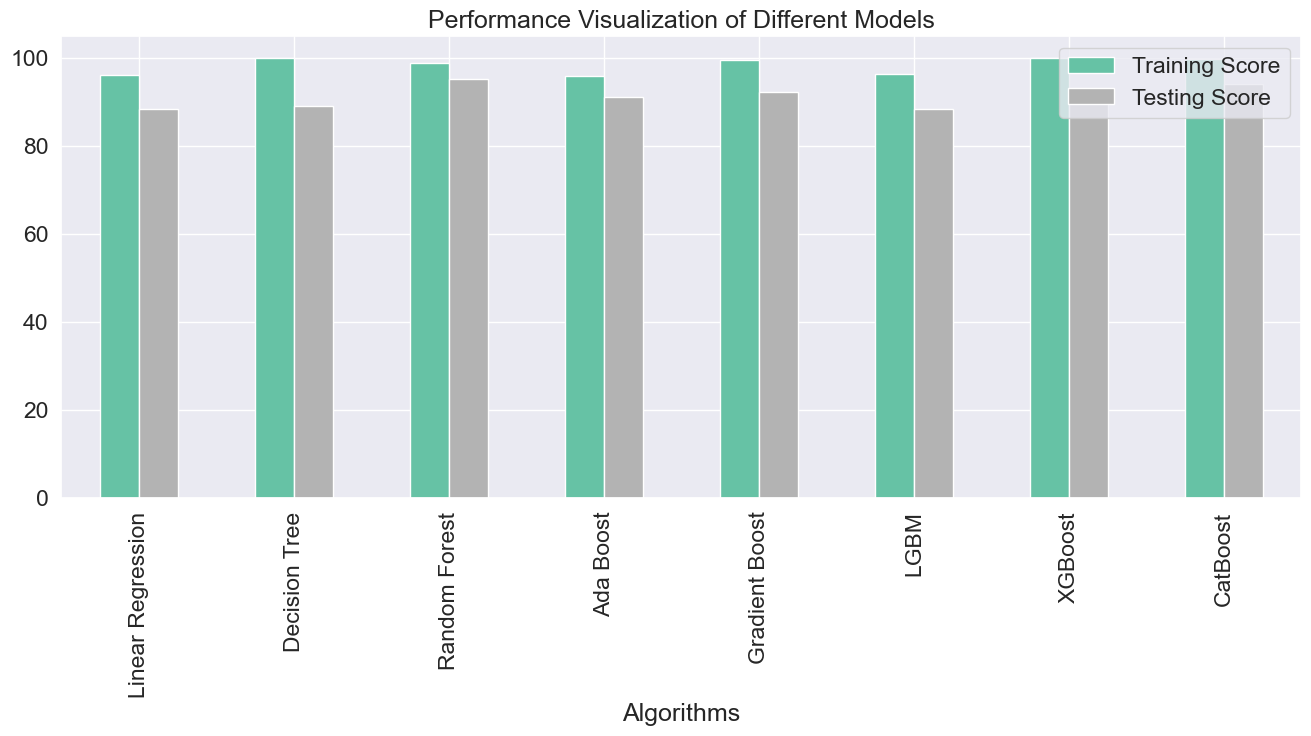

In [871]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set2")
plt.show()